In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [32]:
KEGG_df = pd.read_parquet("../data/interim/enzymemap_Kegg_JN_mapped.parquet")
KEGG_df['top_mapped_operator'] = KEGG_df['top_mapped_operator'].fillna("None")

MetaCyc_df = pd.read_parquet("../data/interim/enzymemap_MetaCyc_JN_mapped.parquet")
MetaCyc_df['top_mapped_operator'] = MetaCyc_df['top_mapped_operator'].fillna("None")

In [36]:
def extract_rule_num(x):
    if x == "None":
        return np.inf   # sort None last
    m = re.search(r'rule(\d+)', x)
    return int(m.group(1)) if m else np.inf


In [34]:
unique_rules = sorted(
    KEGG_df['top_mapped_operator'].unique(),
    key=extract_rule_num
)

# first 50 rules (None appears at the end)
first_50_rules = unique_rules[:50]

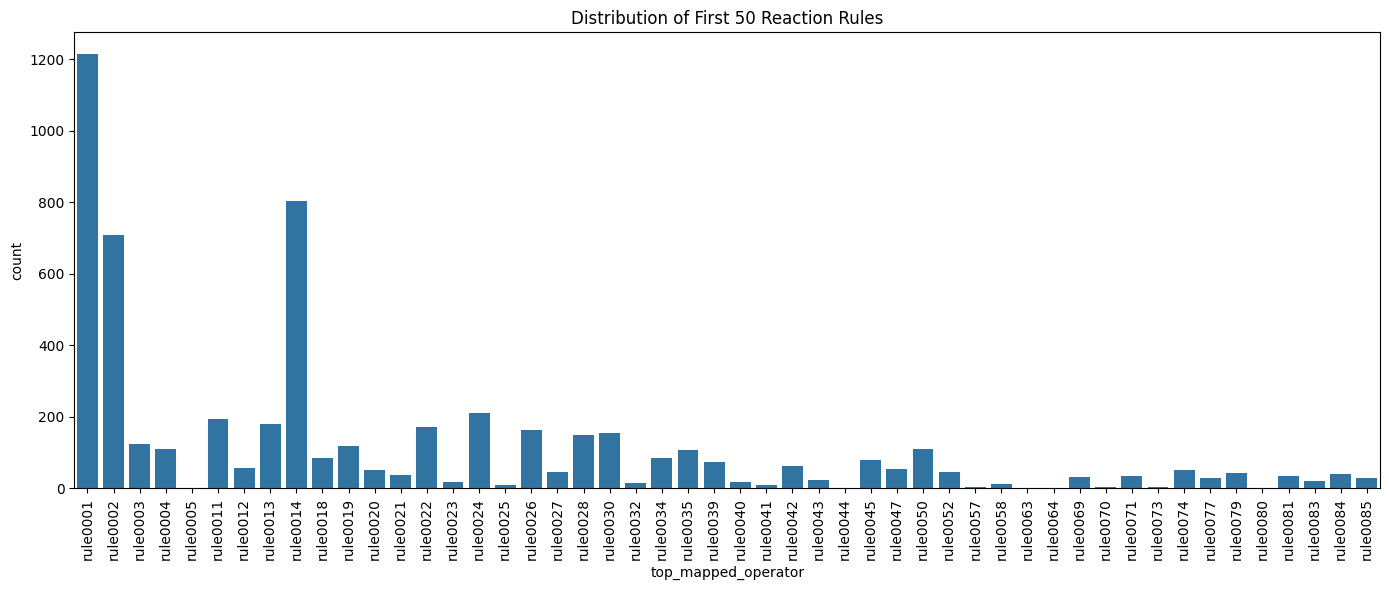

In [35]:
plt.figure(figsize=(14,6))
sns.countplot(
    data=KEGG_df[KEGG_df['top_mapped_operator'].isin(first_50_rules)],
    x='top_mapped_operator',
    order=first_50_rules
)

plt.xticks(rotation=90)
plt.title("Distribution of First 50 Reaction Rules")
plt.tight_layout()
plt.show()
